2. Data Preparation

In [14]:
import os
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [15]:
# Load Images
DATASET_CLEAN_PATH = os.path.join("Dataset", "Dataset Clean")

images = []
classes = []
class_names = {}

for idx, label in enumerate(os.listdir(DATASET_CLEAN_PATH)):
    for filename in os.listdir(os.path.join(DATASET_CLEAN_PATH, label)):
        image_path = os.path.join(DATASET_CLEAN_PATH, label, filename)

        # Load images with no target size and further preprocessing for actual exploration to the data for the raw images (true images)
        image = load_img(image_path, color_mode="rgb", target_size=(200, 200))
            # From observation, the image size varies, so we use target size 200, 200 because we can still distinctly see the pattern
            # without compressing the image too much
        image = np.asarray(image) / 255.
        images.append(image)
        classes.append(idx)

    class_names[idx] = label
    print(f"Class {label} loaded sucessfully")

Class batik-betawi loaded sucessfully
Class batik-megamendung loaded sucessfully
Class batik-parang loaded sucessfully


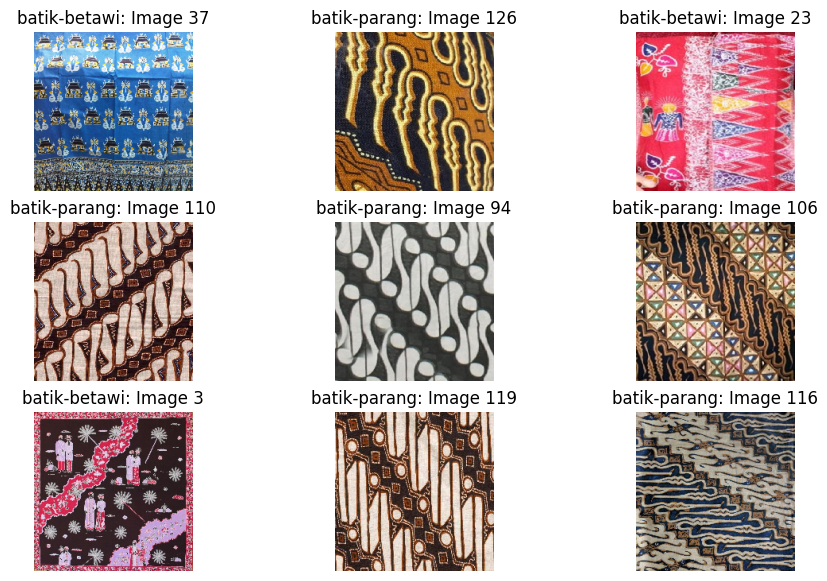

In [16]:
# Load Sample image for each classes
from matplotlib import pyplot as plt
import random

plt.figure(figsize=(11, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    randomNum = random.randrange(0, len(images))
    plt.imshow(images[randomNum])
    plt.axis('off')
    plt.title(f"{class_names[classes[randomNum]]}: Image {randomNum}")

plt.show()

Architecture based on the previous research, the architecture of the CNN model is designed to have 3 convolutional layers, 3 max pooling layers, and 2 fully connected layers. The architecture is shown in the following figure.

Classification of Batik Convolutional Neural Networks Motifs 

Jonathan Tristanto, Janson Hendryli, and Dyah Erny Herwindiati 

Faculty of Information Technology, Tarumanagara University, Jakarta, Indonesia

In [26]:
from sklearn.model_selection import train_test_split

# Train Test Split
x_train, x_temp, y_train, y_temp = train_test_split(images, classes, test_size=0.8, random_state=42, shuffle=True, stratify=classes)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp)

print(f"Length of training data {len(y_train)}")
print(f"Length of testing data {len(y_test)}")
print(f"Length of validation data {len(y_val)}")

Length of training data 29
Length of testing data 58
Length of validation data 58


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D

help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential([
    Conv2D(64, (3, 3), strides=(1, 1), padding='same'),
    MaxPool2D((3, 3), strides=2),
    Conv2D(128, (3, 3), strides=(1, 1), padding='same'),
    MaxPool2D((3, 3), strides=2),
    Conv2D(256, (3, 3), strides=(1, 1), padding='same'),
    MaxPool2D((3, 3), strides=2),
    Conv2D(512, (3, 3), strides=(1, 1), padding='same'),
    MaxPool2D((3, 3), strides=2),
    Conv2D(512, (3, 3), strides=(1, 1), padding='same'),
    MaxPool2D((3, 3), strides=2),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(len(class_names), activation='softmax')
])